In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

Mittelwert: 11.666666666666666 Fehler: 0.9706336227586749


Text(0.5, 1.0, 'Untergrund')

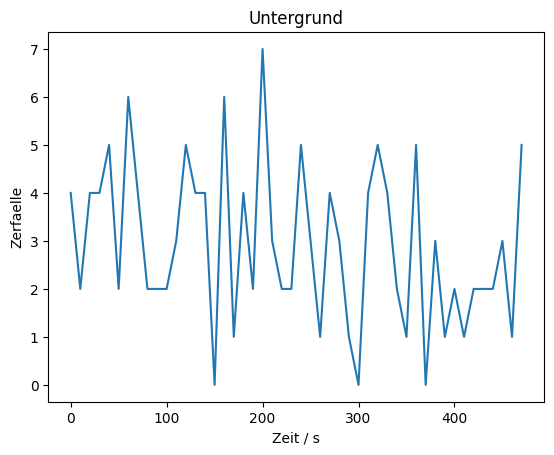

In [34]:
unterg_data=np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/untergrund.txt', usecols=(0,1), delimiter=',', skiprows=4)
unterg_t = unterg_data[:,0]
unterg = unterg_data[:,1]

mittelw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)

plt.plot(unterg_t, unterg)
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Untergrund')
#plt.yscale('log')

In [36]:
#Silber
n1 =np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/silber1.txt', usecols=[1], delimiter=',', skiprows=4)
n2 =np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/silber2.txt', usecols=[1], delimiter=',', skiprows=4)
n3 =np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/silber3.txt', usecols=[1], delimiter=',', skiprows=4)
n4 =np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/silber4.txt', usecols=[1], delimiter=',', skiprows=4)
N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)
t=np.arange(5,405,10)

A1= 394.0457272476453 , Standardfehler= 25.75251461148107
l1= 0.0358759182643203 , Standardfehler= 0.004170154678250027
A2= 113.93580216369494 , Standardfehler= 19.436364912547514
l2= 0.0066328962431032945 , Standardfehler= 0.0007463782170200161


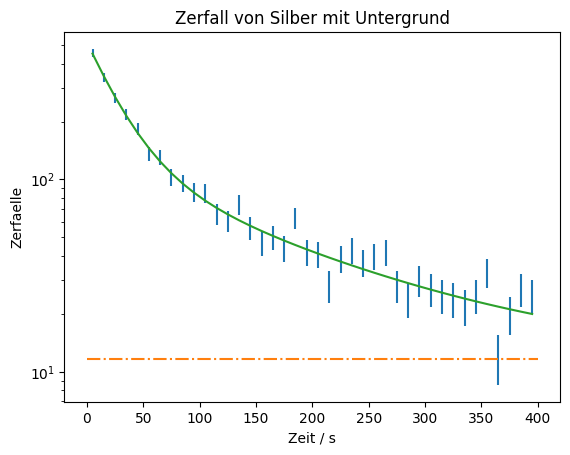

In [62]:
# Fit with background = mean

y0=mittelw_unterg #Untergrund

def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N)

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.plot([0,400], [y0, y0], linestyle='-.')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('C:/Versuch_251_252/Dokumente/Messungen/Mabert/Silber.pdf',format='pdf')
print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standardfehler=", np.sqrt(pcov[3][3]))

l1 = popt[1]
l1_err = np.sqrt(pcov[1][1])
l2 = popt[3]
l2_err = np.sqrt(pcov[3][3])

In [63]:
chi2_=np.sum((fit_func_exp_constbkg(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob,"%")

chi2= 37.559021086270576
chi2_red= 1.0433061412852938
Wahrscheinlichkeit= 40.0 %


In [76]:
# Fit with background = mean - 1sigma

y0 = mittelw_unterg - fehler_unterg #Untergrund

def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

popt_subsig, pcov_subsig = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001,], sigma=Fehler_N)

l1_sub = popt_subsig[1]
l1_sub_err = np.sqrt(pcov_subsig[1][1])
l2_sub = popt_subsig[3]
l2_sub_err = np.sqrt(pcov_subsig[3][3])

In [77]:
# Fit with background = mean - 1sigma

y0 = mittelw_unterg + fehler_unterg #Untergrund

def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

popt_addsig, pcov_addsig = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001,], sigma=Fehler_N)

l1_add = popt_addsig[1]
l1_add_err = np.sqrt(pcov_addsig[1][1])
l2_add = popt_addsig[3]
l2_add_err = np.sqrt(pcov_addsig[3][3])

In [82]:
l1_sub_diff = np.abs(l1 - l1_sub)
l1_add_diff = np.abs(l1 - l1_add)
l2_sub_diff = np.abs(l2 - l2_sub)
l2_add_diff = np.abs(l2 - l2_add)

print(f"|l1 - l1^-| = {l1_sub_diff}")
print(f"|l2 - l2^-| = {l2_sub_diff}")
print(f"|l1 - l1^+| = {l1_add_diff}")
print(f"|l2 - l2^+| = {l2_add_diff}")

l1_err_mean = np.mean([l1_sub_diff, l1_add_diff])
l2_err_mean = np.mean([l2_sub_diff, l2_add_diff])

l1_err_total = np.sqrt(pcov[1][1] + l1_err_mean**2)
l2_err_total = np.sqrt(pcov[3][3] + l2_err_mean**2)

print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", l1_err_total)
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standardfehler=", l2_err_total)

|l1 - l1^-| = 0.00042124086513443265
|l2 - l2^-| = 0.00029156082746610926
|l1 - l1^+| = 0.0004674481376682679
|l2 - l2^+| = 0.0003150093225079281
A1= 394.0457272476453 , Standardfehler= 25.75251461148107
l1= 0.0358759182643203 , Standardfehler= 0.004193761089577732
A2= 113.93580216369494 , Standardfehler= 19.436364912547514
l2= 0.0066328962431032945 , Standardfehler= 0.0008056440154012564


In [83]:
# Halbwertszeit berechnen

lebensdauer_1 = l1 / np.log(2)
lebensdauer_2 = l2 / np.log(2)

lebensdauer_1_err = l1_err_total / np.log(2)
lebensdauer_2_err = l2_err_total / np.log(2)

halbwertszeit_1 = 1 / lebensdauer_1
halbwertszeit_2 = 1 / lebensdauer_2

halbwertszeit_1_err = (1 / (lebensdauer_1**2)) * lebensdauer_1_err
halbwertszeit_2_err = (1 / (lebensdauer_2**2)) * lebensdauer_2_err

print(halbwertszeit_1, halbwertszeit_1_err, halbwertszeit_2, halbwertszeit_2_err)

19.320681228368763 2.2585156026584827 104.50143574621131 12.692940342209267


### Indiumzerfall

Mittelwert: 35.0 Fehler: 2.9119008682760246


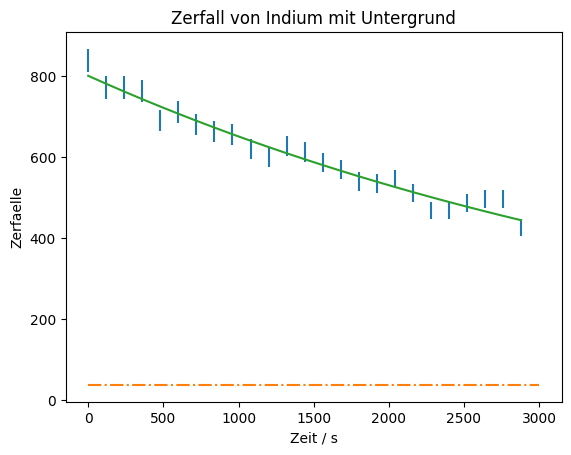

In [100]:
#Indium
indium_data = np.loadtxt('C:/Versuch_251_252/Dokumente/Messungen/Mabert/indium.txt', usecols=[1], delimiter=',', skiprows=4)

mittelw_120_unterg=np.mean(unterg) * 12
fehler_120_unterg=np.std(unterg)/np.sqrt(len(unterg)) * 12
print('Mittelwert:', mittelw_120_unterg, 'Fehler:',fehler_120_unterg)

t_120 = t=np.arange(0, 3000, 120)

plt.errorbar(t_120, indium_data, np.sqrt(indium_data), linestyle='None')
plt.plot([0,3000], [y0, y0], linestyle='-.')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
#plt.yscale('log')

y0 = mittelw_120_unterg

def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

popt_ind, pcov_ind=curve_fit(fit_func,t_120,indium_data, p0=[50,0.001], sigma=np.sqrt(indium_data))

plt.plot(t,fit_func(t,*popt_ind))

l1_ind = popt_ind[1]

In [101]:
# Fit with background = mean - 1sigma

y0 = mittelw_120_unterg - fehler_120_unterg #Untergrund

def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

popt_ind_subsig, pcov_ind_subsig = curve_fit(fit_func, t_120, indium_data, p0=[50,0.001], sigma=np.sqrt(indium_data))

l1_ind_sub = popt_ind_subsig[1]
l1_ind_sub_err = np.sqrt(pcov_ind_subsig[1][1])

In [102]:
# Fit with background = mean + 1sigma

y0 = mittelw_120_unterg + fehler_120_unterg #Untergrund

def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

popt_ind_addsig, pcov_ind_addsig = curve_fit(fit_func, t_120, indium_data, p0=[50,0.001], sigma=np.sqrt(indium_data))

l1_ind_add = popt_ind_addsig[1]
l1_ind_add_err = np.sqrt(pcov_ind_addsig[1][1])

In [106]:
l1_ind_sub_diff = np.abs(l1_ind - l1_ind_sub)
l1_ind_add_diff = np.abs(l1_ind - l1_ind_add)

print(f"|l1 - l1^-| = {l1_ind_sub_diff}")
print(f"|l1 - l1^+| = {l1_ind_add_diff}")

l1_ind_err_mean = np.mean([l1_ind_sub_diff, l1_ind_add_diff])

l1_ind_err_total = np.sqrt(pcov_ind[1][1] + l1_ind_err_mean**2)

print("A1=",popt_ind[0], ", Standardfehler=", np.sqrt(pcov_ind[0][0]))
print("l1=",popt_ind[1], ", Standardfehler=", l1_ind_err_total)

|l1 - l1^-| = 1.1299514958193317e-06
|l1 - l1^+| = 1.141738043473851e-06
A1= 765.6323497526083 , Standardfehler= 10.412435093329925
l1= 0.00021744099384773513 , Standardfehler= 8.971212326764993e-06


In [108]:
lebensdauer_ind = l1_ind / np.log(2)
lebensdauer_ind_err = l1_ind_err_total / np.log(2)

halbwertszeit_ind = 1 / lebensdauer_ind

halbwertszeit_ind_err = (1 / (lebensdauer_ind**2)) * lebensdauer_ind_err

print(halbwertszeit_ind / 60, halbwertszeit_ind_err/60)

53.12914002509629 2.1920098297441246
